###### Text provided under a Creative Commons Attribution license, CC-BY. Code under MIT license. (c)2014 Lorena A. Barba, Olivier Mesnard. Thanks: NSF for support via CAREER award #1149784.

##### Version 0.2 -- February 2014

# Lift on a cylinder

Remember when we computed uniform flow past a [doublet](03_Lesson03_doublet.ipynb)? The stream-line pattern produced flow around a cylinder. When studying the pressure coefficient, we realized that the drag on the cylinder was exactly zero, leading to the _D'Alembert paradox_.

_What about lift?_ Is it possible for a perfectly circular cylinder to experience lift?
What if the cylinder is rotating? Have you heard about the Magnus effect?

You might be surprised to learn that all we need to do is add a [vortex](04_Lesson04_vortex.ipynb) in the center of the cylinder. Let's see how that looks.


First, we recall the equations for the flow of a doublet. In Cartesian coordinates, a doublet located at the origin has a stream function and velocity components given by

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$


$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$


## Let's start computing!

We'll place a doublet of strength $\kappa=1$ at the origin, and add a free stream $U_\infty=1$ (yes, we really like the number one). We can re-use the code we have written before; this is always a good thing.

In [1]:
import math
import numpy
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [3]:
kappa = 1.0                           # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0       # location of the doublet

u_inf = 1.0                           # freestream speed

Here are our function definitions for the doublet:

In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (-strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (-strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = -strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

And now we compute everything to get the flow around a cylinder, by adding a free stream to the doublet:

In [5]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# freestream velocity components
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# stream-function of the freestream flow
psi_freestream = u_inf * Y

# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

We are ready to do a nice visualization.

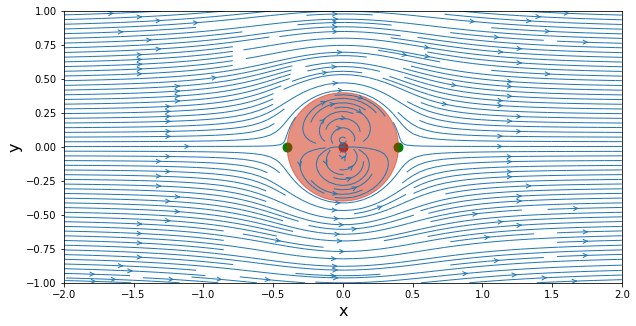

In [6]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the cylinder radius and add the cylinder to the figure
R = math.sqrt(kappa / (2 * math.pi * u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

# calculate the stagnation points and add them to the figure
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

Nice! We have cylinder flow. 

Now, let's add a vortex located at the origin with a positive strength $\Gamma$. In Cartesian coordinates, the stream function and velocity components are given by:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

Based on these equations, we define the functions `get_velocity_vortex()` and `get_stream_function_vortex()` to do ... well, what's obvious by the function names (you should always try to come up with obvious function names). Play around with the value of $\ \Gamma$ and recalculate the flow. See what happens.

In [7]:
gamma = 4.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

In [8]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [9]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

Now that we have all the necessary ingredients (uniform flow, doublet and vortex), we apply the principle of superposition, and then we make a nice plot.

In [10]:
# superposition of the doublet and the vortex on the freestream flow
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

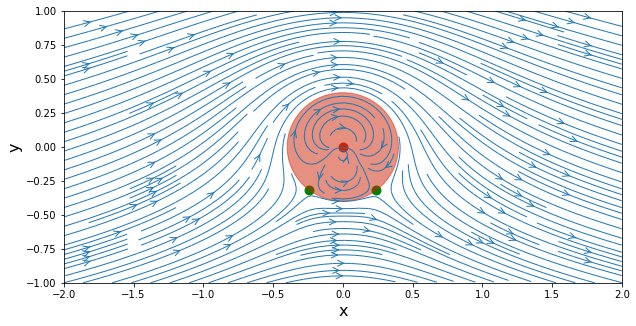

In [11]:
# calculate the cylinder radius
R = math.sqrt(kappa / (2 * math.pi * u_inf))

# calculate the stagnation points
x_stagn1, y_stagn1 = (+math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))
x_stagn2, y_stagn2 = (-math.sqrt(R**2 - (gamma / (4 * math.pi * u_inf))**2),
                      -gamma / (4 * math.pi * u_inf))

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1.5, arrowstyle='->')
circle = pyplot.Circle((0.0, 0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

##### Challenge task

The challenge task in the [doublet notebook](03_Lesson03_doublet.ipynb) was to calculate the radius of the cylinder created by the doublet in a uniform flow. You should have gotten

$$R = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$

The new challenge is to find where the stagnation points are located on the surface of the cylinder, when there's a vortex. (You just need an expression for the angles.)

What hapens if $\ \frac{\Gamma}{4\pi U_\infty R} >1$?

Go back and experiment with a value of $\Gamma$ that causes this.

---

## Pressure coefficient

Let's get the pressure coefficient on the surface of the cylinder and compare with the case with no vortex.
The velocity components in polar coordinates for the combined freestream + doublet + vortex are given by

$$u_r\left(r,\theta\right) = U_\infty \cos\theta \left(1-\frac{R^2}{r^2}\right)$$

$$u_\theta\left(r,\theta\right) = -U_\infty \sin\theta \left(1+\frac{R^2}{r^2}\right) - \frac{\Gamma}{2\pi r}$$

where $R$ is the cylinder radius.

We see that the radial component vanishes on the surface of the cylinder whereas the tangential velocity is given by

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta - \frac{\Gamma}{2\pi R} .$$

As a note, when there is no vortex, the tangential velocity on the cylinder becomes

$$u_\theta\left(R,\theta\right) = -2U_\infty \sin\theta .$$

From the doublet notebook, we know that the pressure coefficient is defined by

$$C_p = 1-\frac{U^2}{U_\infty^2}$$

where $U^2 = u^2+v^2 = u_r^2+u_\theta^2$.

Let's plot it!

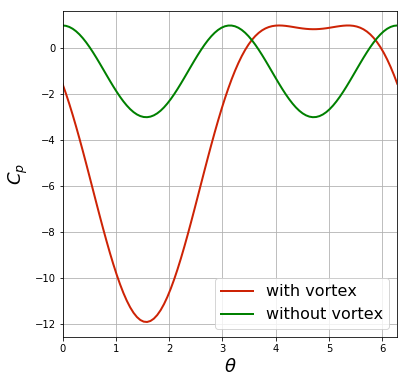

In [12]:
# calculate the surface tangential velocity on the cylinder
theta = numpy.linspace(0.0, 2 * math.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * math.pi * R)

# compute the surface pressure coefficient
cp = 1.0 - (u_theta / u_inf)**2

# if there was no vortex
u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf)**2

# plot the surface pressure coefficient
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});

## Lift and Drag

The lift is the component of force perpendicular to $U_\infty$, while the drag is the component parallel to $U_\infty$. How could we get them with the information we have above? 

Well, the force on the cylinder is a product of the pressure acting on its surface (there is no viscosity here: it's ideal flow). If you draw a free body diagram, you should see that:

$$D = -\int_0^{2\pi} p \ \cos\theta \ R \ d\theta$$

$$L = -\int_0^{2\pi} p \ \sin\theta \ R \ d\theta$$


##### Challenge Task

Using Bernoulli's equation, replace $p$ in the equations above to obtain the lift and drag.

What does this mean?

## The Magnus effect

The force experienced by a rotating cylinder (or sphere, or any object) is known as the _Magnus effect_.

Believe it or not, someone actually tried to build an airplane with this concept: spinning cylinders as "wings." According to an article on [PilotFriend](http://www.pilotfriend.com/photo_albums/potty/2.htm), a plane called the 921-V was built in 1930 and flew "at least once" before crashing.

In [13]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/7/78/Flettner_Rotor_Aircraft.jpg')

And nowadays, a handful of hobbyists build RC "rotorwings" taking advantage of the Magnus effect to collect views on YouTube ...

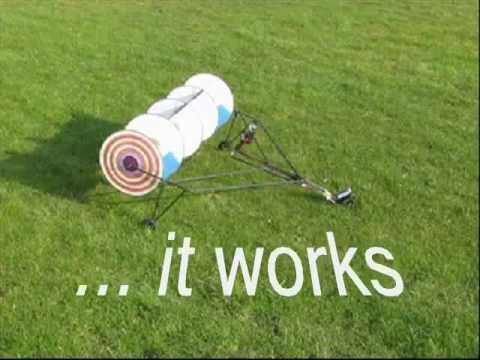

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('POHre1P_E1k')

---

In [15]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')